# Experiment 6-1

Same as `Experiment-6` but used for generating the graphs in the report.

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import networkx as nx

import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [2]:
network_file_1 = "networks/Environment1.inp"
network_file_2 = "networks/Environment2.inp"
network_file_3 = "networks/Environment3.inp"

env1 = Network(network_file_1)
env2 = Network(network_file_2)
env3 = Network(network_file_3)

g_env1 = env1.water_network_model.to_graph().to_undirected()
g_env2 = env2.water_network_model.to_graph().to_undirected()
g_env3 = env3.water_network_model.to_graph().to_undirected()

d_env1 = g_env1.degree
d_env2 = g_env2.degree
d_env3 = g_env3.degree

env1_start_pool = [node for node, degree in d_env1 if degree == 1]
env2_start_pool = [node for node, degree in d_env2 if degree == 1]
env3_start_pool = [node for node, degree in d_env3 if degree == 1]

env1_num_links = env1.graph_num_links
env2_num_links = env2.graph_num_links
env3_num_links = env3.graph_num_links

print("Start Pool - Environment1: ", env1_start_pool)
print("Number of Start Nodes - Environment1: ", len(env1_start_pool))
print("Number of Nodes - Environment1: ", env1.graph_num_nodes)
print("Number of Links - Environment1: ", env1.graph_num_links)

print("Start Pool - Environment2: ", env2_start_pool)
print("Number of Start Nodes - Environment2: ", len(env2_start_pool))
print("Number of Nodes - Environment2: ", env2.graph_num_nodes)
print("Number of Links - Environment2: ", env2.graph_num_links)

print("Start Pool - Environment3: ", env3_start_pool)
print("Number of Start Nodes - Environment3: ", len(env3_start_pool))
print("Number of Nodes - Environment3: ", env3.graph_num_nodes)
print("Number of Links - Environment3: ", env3.graph_num_links)

Start Pool - Environment1:  ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of Start Nodes - Environment1:  16
Number of Nodes - Environment1:  97
Number of Links - Environment1:  119
Start Pool - Environment2:  ['A2148', 'A3007', 'A3018', 'A5065', 'A5071', 'A5078', 'A5153', 'A5169', 'A5174', 'A5175', 'A5178', 'A5183', 'A5184', 'A5185', 'A5187', 'A5189', 'A5191', 'A5197', 'A5200', 'A5202', 'A5205', 'A5245', 'A5247', 'A5255', 'A5271', 'A5279', 'A5283', 'A5285', 'A5306', 'A5311', 'A5323', 'A5342', 'A5343', 'A5348', 'A5351', 'A5354', 'A5357', 'A5376', 'A5377', 'A5379', 'A5383', 'A5387', 'A5390', 'A5391', 'A5394', 'A5396', 'A5398', 'A5400', 'A5404', 'A5407', 'A5408', 'A5412', 'A5423', 'A5424', 'A5426', 'A5428', 'A5430', 'A5431', 'A5435', 'A5440', 'A5448', 'A5450', 'A5451', 'A5460', 'A5462', 'A5471', 'A5473', 'A5474', 'A5480', 'A5481', 'A5485', 'A5502', 'A5510', 'A5513', 'A5515', 'A5701', 'A5708', 'AN-1871', 'N-0457', 'N-045

## Function Definitions

In [3]:
def run_simulation_batch(env, num_agents, start_nodes, filepath, max_turns=100):
    print("Starting Simulation Batch - ", filepath)
    print("Number of Agents: ", num_agents)
    print("Start Nodes: ", start_nodes)
    print("Max Turns: ", max_turns)
    
    # Run the simulations for no swarm control
    path = f'{filepath}/NoSwarm'
    simulations_1 = []
    for node in start_nodes:
        print("Starting No Swarm Simulation from Start Node: ", node)
        sim = Simulation(env, num_agents, swarm=False, start_positions=[node], filepath=path)
        simulations_1.append((node, sim.path_to_results_directory))
        sim.run(max_turns=max_turns)
    yield simulations_1
    
    # Run the simulations for naive swarm control
    path = f'{filepath}/NaiveSwarm'
    swarm_config = {'swarm': True, 'swarm_type': 'naive'}
    simulations_2 = []
    for node in start_nodes:
        print("Starting Naive Swarm Simulation from Start Node: ", node)
        sim = Simulation(env, num_agents, swarm=True, swarm_config=swarm_config, start_positions=[node], filepath=path)
        simulations_2.append((node, sim.path_to_results_directory))
        sim.run(max_turns=max_turns)
    yield simulations_2
    
    # Run the simulations for informed mean swarm control
    path = f'{filepath}/InformedMeanSwarm'
    swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}
    simulations_3 = []
    for node in start_nodes:
        print("Starting Informed Mean Swarm Simulation from Start Node: ", node)
        sim = Simulation(env, num_agents, swarm=True, swarm_config=swarm_config, start_positions=[node], filepath=path)
        simulations_3.append((node, sim.path_to_results_directory))
        sim.run(max_turns=max_turns)    
    yield simulations_3
    
    # Run the simulations for informed median swarm control
    path = f'{filepath}/InformedMedianSwarm'
    swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}
    simulations_4 = []
    for node in start_nodes:
        print("Starting Informed Median Swarm Simulation from Start Node: ", node)
        sim = Simulation(env, num_agents, swarm=True, swarm_config=swarm_config, start_positions=[node], filepath=path)
        simulations_4.append((node, sim.path_to_results_directory))
        sim.run(max_turns=max_turns)
    yield simulations_4

In [4]:
from typing import List

# Read the results from the simulations
def read_results(simulations):
    results = []
    for sim in simulations:
        start_node, path = sim
        df = pd.read_csv(f"{path}/results.csv")
        df['start_node'] = start_node
        df.start_node = start_node
        results.append(df)
    return results

# Make the results into a single dataframe with turns as the columns and the data of interest as the rows
def make_results_dataframe(results, data_of_interest):
    df = pd.DataFrame()
    # Get the data of interest
    data = [result[['turn', data_of_interest, 'start_node']] for result in results]
    # Make the turn number the columns
    for result in data:
        start_node = result.start_node.unique()[0]

        result = result.T
        result.columns = result.iloc[0].astype(int)
        result = result.drop('turn')
        
        # Drop the start node row
        result = result.drop('start_node')
        # Add the start node to the dataframe
        result['start_node'] = start_node
        
        if df.empty:
            df = result
        else:
            df = pd.concat([df, result])
            
    # Check that each column that is a turn number has data of numeric type and if not, make it numeric (float)
    for column in df.columns:
        if column != 'start_node':
            if not pd.api.types.is_numeric_dtype(df[column]):
                df[column] = pd.to_numeric(df[column], errors='coerce')
            
    # Get the mean, min, max and standard deviation for each column
    df.loc['mean'] = df.mean(numeric_only=True)
    df.loc['min'] = df.min(numeric_only=True)
    df.loc['max'] = df.max(numeric_only=True)
    df.loc['std'] = df.std(numeric_only=True)
            
    return df

# Get the results from the simulations and make them into a dataframe
def get_results(simulations, data_of_interest):
    results = read_results(simulations)
    df = make_results_dataframe(results, data_of_interest)
    return df

# Get a list of dataframes with the results from the simulations for each environment
def l_environment_dataframe(swarm_types:list, simulations:list):
    experiment_dfs = []
    for simulation in simulations:
        df = read_results(simulation)
        experiment_dfs.append(df)
        
    return experiment_dfs

# Get a dataframe with the results from the simulations for each environment
def environment_dataframe(swarm_types:list, simulations:list, data_of_interest):
    experiment_dfs = []
    for simulation in simulations:
        df = get_results(simulation, data_of_interest)
        experiment_dfs.append(df)
    
    dataframe = pd.DataFrame()
    
    for swarm_type, df in zip(swarm_types, experiment_dfs):
        dataframe[f'{swarm_type}-mean'] = df.loc['mean']
        dataframe[f'{swarm_type}-min'] = df.loc['min']
        dataframe[f'{swarm_type}-max'] = df.loc['max']
        dataframe[f'{swarm_type}-std'] = df.loc['std']
        
    # Drop any columns that are all NaN
    dataframe = dataframe.dropna(axis=1, how='all')
    # Drop any rows that are all NaN
    dataframe = dataframe.dropna(axis=0, how='all')
    
    return dataframe

def start_node_results_max(swarm_types, sims):
    results = pd.DataFrame()
    
    for swarm_type, sim in zip(swarm_types, sims):
        for start_node, simulation_path in sim:
            path = f'{simulation_path}/results.csv'
            df = pd.read_csv(path)
            df.start_node = start_node
            # get the max pct_links_explored for the entire simulation run
            max_pct_links_explored = df.pct_links_explored.max()
            # get the mean link_novelty_score for the entire simulation run
            mean_link_novelty_score = df.link_novelty_score.mean()
            # add the mean values to the results dataframe for the given swarm type and start node
            temp = pd.DataFrame({'swarm_type': swarm_type, 'start_node': start_node, 'max_pct_links_explored': max_pct_links_explored, 'mean_link_novelty_score': mean_link_novelty_score}, index=[0])
            results = pd.concat([results, temp], ignore_index=True)
            
    return results

In [33]:
def max_pct_all_start(swarm_types, sims):
    results = pd.DataFrame()
    
    for swarm_type, sim in zip(swarm_types, sims):
        for start_node, simulation_path in sim:
            path = f'{simulation_path}/results.csv'
            df = pd.read_csv(path)
            df.start_node = start_node
            # get the max pct_links_explored for the entire simulation run
            max_pct_links_explored = df.pct_links_explored.max()
            # add the mean values to the results dataframe for the given swarm type and start node
            temp = pd.DataFrame({'swarm_type': swarm_type, 'start_node': start_node, 'max_pct_links_explored': max_pct_links_explored}, index=[0])
            results = pd.concat([results, temp], ignore_index=True)
            
    return results

In [5]:
swarm_type_to_linestyle = {
    'no-swarm': 'solid',
    'naive': 'dashed',
    'informed-mean': 'dotted',
    'informed-median': 'dashdot'
}
    
swarm_type_to_colour = {
    'no-swarm': 'black',
    'naive': 'red',
    'informed-mean': 'blue',
    'informed-median': 'green'
}

swarm_type_to_errorbar = {
    'no-swarm': (0,10),
    'naive': (3,10),
    'informed-mean': (6,10),
    'informed-median': (8,10)
}

## Simulation 1 - Environment 1

In [6]:
start_nodes = env1_start_pool[:15]
num_agents = 10
max_turns = 100
filepath = "notable-results/Experiment-6-1/Env1"

print("Start Nodes: ", start_nodes)

Start Nodes:  ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']


### Simulations

In [7]:
simulations_6_1 = run_simulation_batch(env1, num_agents, start_nodes, filepath, max_turns=max_turns)

In [8]:
no_swarm_env1 = next(simulations_6_1)

Starting Simulation Batch -  notable-results/Experiment-6-1/Env1
Number of Agents:  10
Start Nodes:  ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']
Max Turns:  100
Starting No Swarm Simulation from Start Node:  15
Starting No Swarm Simulation from Start Node:  35
Starting No Swarm Simulation from Start Node:  131
Starting No Swarm Simulation from Start Node:  166
Starting No Swarm Simulation from Start Node:  167
Starting No Swarm Simulation from Start Node:  203
Starting No Swarm Simulation from Start Node:  219
Starting No Swarm Simulation from Start Node:  225
Starting No Swarm Simulation from Start Node:  231
Starting No Swarm Simulation from Start Node:  243
Starting No Swarm Simulation from Start Node:  253
Starting No Swarm Simulation from Start Node:  River
Starting No Swarm Simulation from Start Node:  Lake
Starting No Swarm Simulation from Start Node:  1
Starting No Swarm Simulation from Start Node:  2


In [9]:
naive_swarm_env1 = next(simulations_6_1)

Starting Naive Swarm Simulation from Start Node:  15
Starting Naive Swarm Simulation from Start Node:  35
Starting Naive Swarm Simulation from Start Node:  131
Starting Naive Swarm Simulation from Start Node:  166
Starting Naive Swarm Simulation from Start Node:  167
Starting Naive Swarm Simulation from Start Node:  203
Starting Naive Swarm Simulation from Start Node:  219
Starting Naive Swarm Simulation from Start Node:  225
Starting Naive Swarm Simulation from Start Node:  231
Starting Naive Swarm Simulation from Start Node:  243
Starting Naive Swarm Simulation from Start Node:  253
Starting Naive Swarm Simulation from Start Node:  River
Starting Naive Swarm Simulation from Start Node:  Lake
Starting Naive Swarm Simulation from Start Node:  1
Starting Naive Swarm Simulation from Start Node:  2


In [10]:
informed_mean_swarm_env1 = next(simulations_6_1)

Starting Informed Mean Swarm Simulation from Start Node:  15
Starting Informed Mean Swarm Simulation from Start Node:  35
Starting Informed Mean Swarm Simulation from Start Node:  131
Starting Informed Mean Swarm Simulation from Start Node:  166
Starting Informed Mean Swarm Simulation from Start Node:  167
Starting Informed Mean Swarm Simulation from Start Node:  203
Starting Informed Mean Swarm Simulation from Start Node:  219
Starting Informed Mean Swarm Simulation from Start Node:  225
Starting Informed Mean Swarm Simulation from Start Node:  231
Starting Informed Mean Swarm Simulation from Start Node:  243
Starting Informed Mean Swarm Simulation from Start Node:  253
Starting Informed Mean Swarm Simulation from Start Node:  River
Starting Informed Mean Swarm Simulation from Start Node:  Lake
Starting Informed Mean Swarm Simulation from Start Node:  1
Starting Informed Mean Swarm Simulation from Start Node:  2


In [11]:
informed_median_swarm_env1 = next(simulations_6_1)

Starting Informed Median Swarm Simulation from Start Node:  15
Starting Informed Median Swarm Simulation from Start Node:  35
Starting Informed Median Swarm Simulation from Start Node:  131
Starting Informed Median Swarm Simulation from Start Node:  166
Starting Informed Median Swarm Simulation from Start Node:  167
Starting Informed Median Swarm Simulation from Start Node:  203
Starting Informed Median Swarm Simulation from Start Node:  219
Starting Informed Median Swarm Simulation from Start Node:  225
Starting Informed Median Swarm Simulation from Start Node:  231
Starting Informed Median Swarm Simulation from Start Node:  243
Starting Informed Median Swarm Simulation from Start Node:  253
Starting Informed Median Swarm Simulation from Start Node:  River
Starting Informed Median Swarm Simulation from Start Node:  Lake
Starting Informed Median Swarm Simulation from Start Node:  1
Starting Informed Median Swarm Simulation from Start Node:  2


### Results

In [12]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
fig_path = 'notable-results/Figures/Experiment-6-1'

In [35]:
sims = [no_swarm_env1, naive_swarm_env1, informed_mean_swarm_env1, informed_median_swarm_env1]
results_6_1_1 = environment_dataframe(swarm_types, sims, 'pct_links_explored')
results_6_1_1

,no-swarm-mean,no-swarm-min,no-swarm-max,no-swarm-std,naive-mean,naive-min,naive-max,naive-std,informed-mean-mean,informed-mean-min,informed-mean-max,informed-mean-std,informed-median-mean,informed-median-min,informed-median-max,informed-median-std
turn,,,,,,,,,,,,,,,,
0,0.840336,0.840336,0.840336,0.0,0.840336,0.840336,0.840336,0.0,0.840336,0.840336,0.840336,0.0,0.840336,0.840336,0.840336,0.0
1,1.680672,1.680672,1.680672,0.0,2.352941,1.680672,3.361345,0.593197,2.352941,1.680672,3.361345,0.593197,2.352941,1.680672,3.361345,0.593197
2,2.464986,1.680672,2.521008,0.270936,4.64986,3.361345,6.722689,1.322742,4.313725,3.361345,6.722689,1.172025,4.313725,3.361345,6.722689,1.172025
3,3.2493,2.521008,3.361345,0.320467,6.554622,4.201681,10.084034,2.015273,6.554622,4.201681,10.92437,2.006896,6.554622,4.201681,10.92437,2.006896
4,4.033613,2.521008,4.201681,0.559565,8.235294,5.042017,12.605042,2.510864,8.907563,5.042017,15.12605,2.757746,8.907563,5.042017,15.12605,2.757746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36.358543,13.445378,52.10084,13.929878,71.036415,31.932773,100.0,25.972126,82.80112,68.907563,99.159664,8.022919,82.80112,68.907563,99.159664,8.022919
96,36.358543,13.445378,52.10084,13.929878,71.036415,31.932773,100.0,25.972126,82.969188,68.907563,99.159664,8.080258,82.969188,68.907563,99.159664,8.080258
97,36.358543,13.445378,52.10084,13.929878,71.036415,31.932773,100.0,25.972126,83.137255,68.907563,99.159664,8.17016,83.137255,68.907563,99.159664,8.17016


In [37]:
results6_1_1b = max_pct_all_start(swarm_types, sims)
results6_1_1b.sample(5)

,swarm_type,start_node,max_pct_links_explored
38,informed-mean,231,81.512605
10,no-swarm,253,33.613445
35,informed-mean,203,84.033613
23,naive,231,32.773109
3,no-swarm,166,52.100840


### Graphs

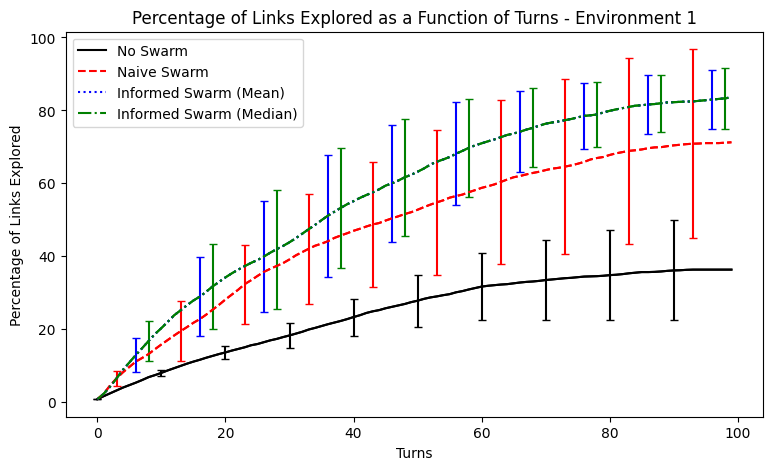

In [14]:
plt.figure(figsize=(9, 5))
plt.title("Percentage of Links Explored as a Function of Turns - Environment 1")
plt.xlabel("Turns")
plt.ylabel("Percentage of Links Explored")

# Plot the results for each swarm type, the error bars are the standard deviation
plt.plot(results_6_1_1.index, results_6_1_1['no-swarm-mean'], label='No Swarm', 
         color=swarm_type_to_colour['no-swarm'], linestyle=swarm_type_to_linestyle['no-swarm'])
plt.errorbar(results_6_1_1.index, results_6_1_1['no-swarm-mean'], 
             yerr=results_6_1_1['no-swarm-std'], 
             capsize=3, errorevery=swarm_type_to_errorbar['no-swarm'],
             color=swarm_type_to_colour['no-swarm'], linestyle=swarm_type_to_linestyle['no-swarm'])

plt.plot(results_6_1_1.index, results_6_1_1['naive-mean'], label='Naive Swarm',
            color=swarm_type_to_colour['naive'], linestyle=swarm_type_to_linestyle['naive'])
plt.errorbar(results_6_1_1.index, results_6_1_1['naive-mean'],
                yerr=results_6_1_1['naive-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['naive'],
                color=swarm_type_to_colour['naive'], linestyle=swarm_type_to_linestyle['naive'])

plt.plot(results_6_1_1.index, results_6_1_1['informed-mean-mean'], label='Informed Swarm (Mean)',
            color=swarm_type_to_colour['informed-mean'], linestyle=swarm_type_to_linestyle['informed-mean'])
plt.errorbar(results_6_1_1.index, results_6_1_1['informed-mean-mean'],
                yerr=results_6_1_1['informed-mean-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['informed-mean'],
                color=swarm_type_to_colour['informed-mean'], linestyle=swarm_type_to_linestyle['informed-mean'])

plt.plot(results_6_1_1.index, results_6_1_1['informed-median-mean'], label='Informed Swarm (Median)',
            color=swarm_type_to_colour['informed-median'], linestyle=swarm_type_to_linestyle['informed-median'])
plt.errorbar(results_6_1_1.index, results_6_1_1['informed-median-mean'],
                yerr=results_6_1_1['informed-median-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['informed-median'],
                color=swarm_type_to_colour['informed-median'], linestyle=swarm_type_to_linestyle['informed-median'])


plt.legend()

plt.savefig(f'{fig_path}/pct-links-explored-env1.png', dpi=300)
plt.savefig(f'{fig_path}/pct-links-explored-env1.eps', dpi=300)


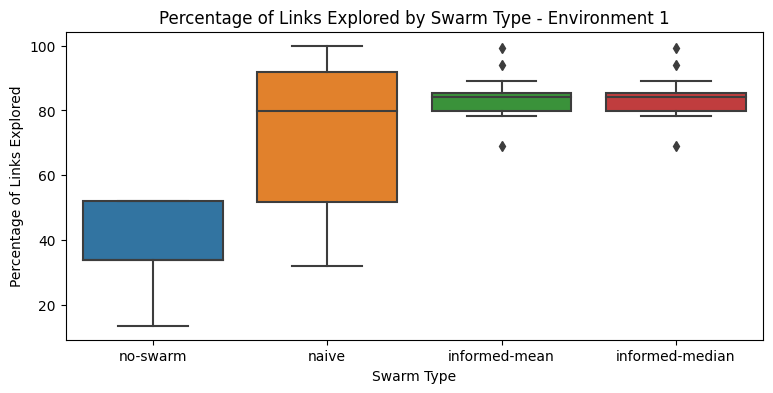

In [46]:
fig = plt.figure(figsize=(9, 4))
plt.title("Percentage of Links Explored by Swarm Type - Environment 1")

# Box plot of the results for each swarm type (the swarm type is the x-axis)
sns.boxplot(x='swarm_type', y='max_pct_links_explored', data=results6_1_1b)
plt.xlabel("Swarm Type")
plt.ylabel("Percentage of Links Explored")

# Save the figure as a png and an eps
plt.savefig(f'{fig_path}/pct-links-explored-boxplot-env1.png', dpi=300)
plt.savefig(f'{fig_path}/pct-links-explored-boxplot-env1.eps', dpi=300)

## Simulation 2 - Environment 2

In [15]:
start_nodes = env2_start_pool[:15]
num_agents = 10
max_turns = 100
filepath = "notable-results/Experiment-6/Env2"

print("Start Nodes: ", start_nodes)

Start Nodes:  ['A2148', 'A3007', 'A3018', 'A5065', 'A5071', 'A5078', 'A5153', 'A5169', 'A5174', 'A5175', 'A5178', 'A5183', 'A5184', 'A5185', 'A5187']


### Simulations

In [16]:
simulations_6_2 = run_simulation_batch(env2, num_agents, start_nodes, filepath, max_turns=max_turns)

In [17]:
no_swarm_env2 = next(simulations_6_2)

Starting Simulation Batch -  notable-results/Experiment-6/Env2
Number of Agents:  10
Start Nodes:  ['A2148', 'A3007', 'A3018', 'A5065', 'A5071', 'A5078', 'A5153', 'A5169', 'A5174', 'A5175', 'A5178', 'A5183', 'A5184', 'A5185', 'A5187']
Max Turns:  100
Starting No Swarm Simulation from Start Node:  A2148
Starting No Swarm Simulation from Start Node:  A3007
Starting No Swarm Simulation from Start Node:  A3018
Starting No Swarm Simulation from Start Node:  A5065
Starting No Swarm Simulation from Start Node:  A5071
Starting No Swarm Simulation from Start Node:  A5078
Starting No Swarm Simulation from Start Node:  A5153
Starting No Swarm Simulation from Start Node:  A5169
Starting No Swarm Simulation from Start Node:  A5174
Starting No Swarm Simulation from Start Node:  A5175
Starting No Swarm Simulation from Start Node:  A5178
Starting No Swarm Simulation from Start Node:  A5183
Starting No Swarm Simulation from Start Node:  A5184
Starting No Swarm Simulation from Start Node:  A5185
Startin

In [18]:
naive_swarm_env2 = next(simulations_6_2)

Starting Naive Swarm Simulation from Start Node:  A2148
Starting Naive Swarm Simulation from Start Node:  A3007
Starting Naive Swarm Simulation from Start Node:  A3018
Starting Naive Swarm Simulation from Start Node:  A5065
Starting Naive Swarm Simulation from Start Node:  A5071
Starting Naive Swarm Simulation from Start Node:  A5078
Starting Naive Swarm Simulation from Start Node:  A5153
Starting Naive Swarm Simulation from Start Node:  A5169
Starting Naive Swarm Simulation from Start Node:  A5174
Starting Naive Swarm Simulation from Start Node:  A5175
Starting Naive Swarm Simulation from Start Node:  A5178
Starting Naive Swarm Simulation from Start Node:  A5183
Starting Naive Swarm Simulation from Start Node:  A5184
Starting Naive Swarm Simulation from Start Node:  A5185
Starting Naive Swarm Simulation from Start Node:  A5187


In [19]:
informed_mean_swarm_env2 = next(simulations_6_2)

Starting Informed Mean Swarm Simulation from Start Node:  A2148
Starting Informed Mean Swarm Simulation from Start Node:  A3007
Starting Informed Mean Swarm Simulation from Start Node:  A3018
Starting Informed Mean Swarm Simulation from Start Node:  A5065
Starting Informed Mean Swarm Simulation from Start Node:  A5071
Starting Informed Mean Swarm Simulation from Start Node:  A5078
Starting Informed Mean Swarm Simulation from Start Node:  A5153
Starting Informed Mean Swarm Simulation from Start Node:  A5169
Starting Informed Mean Swarm Simulation from Start Node:  A5174
Starting Informed Mean Swarm Simulation from Start Node:  A5175
Starting Informed Mean Swarm Simulation from Start Node:  A5178
Starting Informed Mean Swarm Simulation from Start Node:  A5183
Starting Informed Mean Swarm Simulation from Start Node:  A5184
Starting Informed Mean Swarm Simulation from Start Node:  A5185
Starting Informed Mean Swarm Simulation from Start Node:  A5187


In [20]:
informed_median_swarm_env2 = next(simulations_6_2)

Starting Informed Median Swarm Simulation from Start Node:  A2148
Starting Informed Median Swarm Simulation from Start Node:  A3007
Starting Informed Median Swarm Simulation from Start Node:  A3018
Starting Informed Median Swarm Simulation from Start Node:  A5065
Starting Informed Median Swarm Simulation from Start Node:  A5071
Starting Informed Median Swarm Simulation from Start Node:  A5078
Starting Informed Median Swarm Simulation from Start Node:  A5153
Starting Informed Median Swarm Simulation from Start Node:  A5169
Starting Informed Median Swarm Simulation from Start Node:  A5174
Starting Informed Median Swarm Simulation from Start Node:  A5175
Starting Informed Median Swarm Simulation from Start Node:  A5178
Starting Informed Median Swarm Simulation from Start Node:  A5183
Starting Informed Median Swarm Simulation from Start Node:  A5184
Starting Informed Median Swarm Simulation from Start Node:  A5185
Starting Informed Median Swarm Simulation from Start Node:  A5187


### Results

In [21]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
fig_path = 'notable-results/Figures/Experiment-6-1'

In [47]:
sims = [no_swarm_env2, naive_swarm_env2, informed_mean_swarm_env2, informed_median_swarm_env2]
results_6_1_2 = environment_dataframe(swarm_types, sims, 'pct_links_explored')
results_6_1_2

,no-swarm-mean,no-swarm-min,no-swarm-max,no-swarm-std,naive-mean,naive-min,naive-max,naive-std,informed-mean-mean,informed-mean-min,informed-mean-max,informed-mean-std,informed-median-mean,informed-median-min,informed-median-max,informed-median-std
turn,,,,,,,,,,,,,,,,
0,0.178891,0.178891,0.178891,0.0,0.178891,0.178891,0.178891,0.0,0.178891,0.178891,0.178891,0.0,0.178891,0.178891,0.178891,0.0
1,0.357782,0.357782,0.357782,0.0,0.536673,0.357782,0.715564,0.122718,0.536673,0.357782,0.715564,0.122718,0.536673,0.357782,0.715564,0.122718
2,0.536673,0.536673,0.536673,0.0,1.061419,0.536673,1.431127,0.30608,1.025641,0.536673,1.431127,0.30535,1.025641,0.536673,1.431127,0.30535
3,0.691711,0.536673,0.715564,0.068221,1.514609,0.715564,2.325581,0.517449,1.502683,0.715564,2.146691,0.502029,1.502683,0.715564,2.146691,0.502029
4,0.84675,0.536673,0.894454,0.121867,1.920095,1.073345,3.220036,0.712645,2.039356,1.073345,2.862254,0.62857,2.039356,1.073345,2.862254,0.62857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11.079308,0.894454,14.31127,4.53078,23.351222,11.270125,42.576029,10.8719,30.781157,17.710197,45.080501,8.057264,30.781157,17.710197,45.080501,8.057264
96,11.174717,0.894454,14.490161,4.583367,23.553965,11.270125,42.754919,10.965418,31.10316,18.067979,45.259392,8.026693,31.10316,18.067979,45.259392,8.026693
97,11.293977,0.894454,14.669052,4.637688,23.697078,11.270125,42.754919,11.000602,31.401312,18.246869,45.259392,8.01072,31.401312,18.246869,45.259392,8.01072


In [48]:
results6_1_2b = max_pct_all_start(swarm_types, sims)
results6_1_2b.sample(5)

,swarm_type,start_node,max_pct_links_explored
41,informed-mean,A5183,27.906977
19,naive,A5071,35.420394
1,no-swarm,A3007,1.610018
26,naive,A5183,26.296959
40,informed-mean,A5178,42.218247


### Graphs

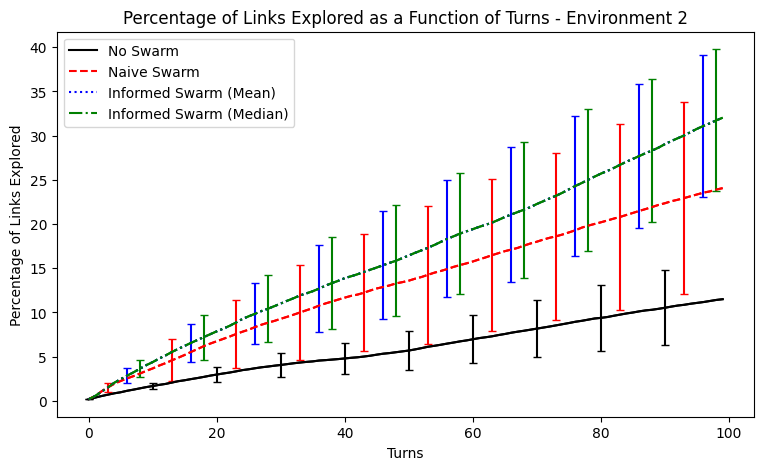

In [23]:
plt.figure(figsize=(9, 5))
plt.title("Percentage of Links Explored as a Function of Turns - Environment 2")
plt.xlabel("Turns")
plt.ylabel("Percentage of Links Explored")

# Plot the results for each swarm type, the error bars are the standard deviation
plt.plot(results_6_1_2.index, results_6_1_2['no-swarm-mean'], label='No Swarm', 
         color=swarm_type_to_colour['no-swarm'], linestyle=swarm_type_to_linestyle['no-swarm'])
plt.errorbar(results_6_1_2.index, results_6_1_2['no-swarm-mean'], 
             yerr=results_6_1_2['no-swarm-std'], 
             capsize=3, errorevery=swarm_type_to_errorbar['no-swarm'],
             color=swarm_type_to_colour['no-swarm'], linestyle=swarm_type_to_linestyle['no-swarm'])

plt.plot(results_6_1_2.index, results_6_1_2['naive-mean'], label='Naive Swarm',
            color=swarm_type_to_colour['naive'], linestyle=swarm_type_to_linestyle['naive'])
plt.errorbar(results_6_1_2.index, results_6_1_2['naive-mean'],
                yerr=results_6_1_2['naive-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['naive'],
                color=swarm_type_to_colour['naive'], linestyle=swarm_type_to_linestyle['naive'])

plt.plot(results_6_1_2.index, results_6_1_2['informed-mean-mean'], label='Informed Swarm (Mean)',
            color=swarm_type_to_colour['informed-mean'], linestyle=swarm_type_to_linestyle['informed-mean'])
plt.errorbar(results_6_1_2.index, results_6_1_2['informed-mean-mean'],
                yerr=results_6_1_2['informed-mean-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['informed-mean'],
                color=swarm_type_to_colour['informed-mean'], linestyle=swarm_type_to_linestyle['informed-mean'])

plt.plot(results_6_1_2.index, results_6_1_2['informed-median-mean'], label='Informed Swarm (Median)',
            color=swarm_type_to_colour['informed-median'], linestyle=swarm_type_to_linestyle['informed-median'])
plt.errorbar(results_6_1_2.index, results_6_1_2['informed-median-mean'],
                yerr=results_6_1_2['informed-median-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['informed-median'],
                color=swarm_type_to_colour['informed-median'], linestyle=swarm_type_to_linestyle['informed-median'])


plt.legend()

plt.savefig(f'{fig_path}/pct-links-explored-env2.png', dpi=300)
plt.savefig(f'{fig_path}/pct-links-explored-env2.eps', dpi=300)


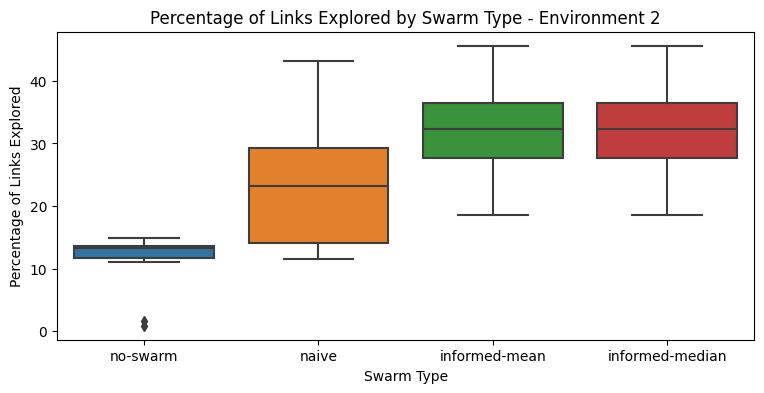

In [49]:
fig = plt.figure(figsize=(9, 4))
plt.title("Percentage of Links Explored by Swarm Type - Environment 2")

# Box plot of the results for each swarm type (the swarm type is the x-axis)
sns.boxplot(x='swarm_type', y='max_pct_links_explored', data=results6_1_2b)
plt.xlabel("Swarm Type")
plt.ylabel("Percentage of Links Explored")

# Save the figure as a png and an eps
plt.savefig(f'{fig_path}/pct-links-explored-boxplot-env2.png', dpi=300)
plt.savefig(f'{fig_path}/pct-links-explored-boxplot-env2.eps', dpi=300)

## Simulation 3 - Environment 3

In [24]:
start_nodes = env3_start_pool[:15]
num_agents = 10
max_turns = 100
filepath = "notable-results/Experiment-6/Env3"

print("Start Nodes: ", start_nodes)

Start Nodes:  ['JUNCTION-12', 'JUNCTION-16', 'JUNCTION-20', 'JUNCTION-21', 'JUNCTION-38', 'JUNCTION-39', 'JUNCTION-40', 'JUNCTION-41', 'JUNCTION-45', 'JUNCTION-53', 'JUNCTION-74', 'JUNCTION-75', 'JUNCTION-81', 'JUNCTION-88', 'JUNCTION-96']


### Simulations

In [25]:
simulations_6_3 = run_simulation_batch(env3, num_agents, start_nodes, filepath, max_turns=max_turns)

In [26]:
no_swarm_env3 = next(simulations_6_3)

Starting Simulation Batch -  notable-results/Experiment-6/Env3
Number of Agents:  10
Start Nodes:  ['JUNCTION-12', 'JUNCTION-16', 'JUNCTION-20', 'JUNCTION-21', 'JUNCTION-38', 'JUNCTION-39', 'JUNCTION-40', 'JUNCTION-41', 'JUNCTION-45', 'JUNCTION-53', 'JUNCTION-74', 'JUNCTION-75', 'JUNCTION-81', 'JUNCTION-88', 'JUNCTION-96']
Max Turns:  100
Starting No Swarm Simulation from Start Node:  JUNCTION-12
Starting No Swarm Simulation from Start Node:  JUNCTION-16
Starting No Swarm Simulation from Start Node:  JUNCTION-20
Starting No Swarm Simulation from Start Node:  JUNCTION-21
Starting No Swarm Simulation from Start Node:  JUNCTION-38
Starting No Swarm Simulation from Start Node:  JUNCTION-39
Starting No Swarm Simulation from Start Node:  JUNCTION-40
Starting No Swarm Simulation from Start Node:  JUNCTION-41
Starting No Swarm Simulation from Start Node:  JUNCTION-45
Starting No Swarm Simulation from Start Node:  JUNCTION-53
Starting No Swarm Simulation from Start Node:  JUNCTION-74
Starting N

In [27]:
naive_swarm_env3 = next(simulations_6_3)

Starting Naive Swarm Simulation from Start Node:  JUNCTION-12
Starting Naive Swarm Simulation from Start Node:  JUNCTION-16
Starting Naive Swarm Simulation from Start Node:  JUNCTION-20
Starting Naive Swarm Simulation from Start Node:  JUNCTION-21
Starting Naive Swarm Simulation from Start Node:  JUNCTION-38
Starting Naive Swarm Simulation from Start Node:  JUNCTION-39
Starting Naive Swarm Simulation from Start Node:  JUNCTION-40
Starting Naive Swarm Simulation from Start Node:  JUNCTION-41
Starting Naive Swarm Simulation from Start Node:  JUNCTION-45
Starting Naive Swarm Simulation from Start Node:  JUNCTION-53
Starting Naive Swarm Simulation from Start Node:  JUNCTION-74
Starting Naive Swarm Simulation from Start Node:  JUNCTION-75
Starting Naive Swarm Simulation from Start Node:  JUNCTION-81
Starting Naive Swarm Simulation from Start Node:  JUNCTION-88
Starting Naive Swarm Simulation from Start Node:  JUNCTION-96


In [28]:
informed_mean_swarm_env3 = next(simulations_6_3)

Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-12
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-16
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-20
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-21
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-38
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-39
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-40
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-41
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-45
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-53
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-74
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-75
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-81
Starting Informed Mean Swarm Simulation from Start Node:  JUNCTION-88
Starting Informed Me

In [29]:
informed_median_swarm_env3 = next(simulations_6_3)

Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-12
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-16
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-20
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-21
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-38
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-39
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-40
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-41
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-45
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-53
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-74
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-75
Starting Informed Median Swarm Simulation from Start Node:  JUNCTION-81
Starting Informed Median Swarm Simulation from Start Node:  JUNC

### Results

In [51]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
fig_path = 'notable-results/Figures/Experiment-6-1'

In [52]:
sims = [no_swarm_env3, naive_swarm_env3, informed_mean_swarm_env3, informed_median_swarm_env3]
results_6_1_3 = environment_dataframe(swarm_types, sims, 'pct_links_explored')
results_6_1_3

,no-swarm-mean,no-swarm-min,no-swarm-max,no-swarm-std,naive-mean,naive-min,naive-max,naive-std,informed-mean-mean,informed-mean-min,informed-mean-max,informed-mean-std,informed-median-mean,informed-median-min,informed-median-max,informed-median-std
turn,,,,,,,,,,,,,,,,
0,0.02611,0.02611,0.02611,0.0,0.02611,0.02611,0.02611,0.0,0.02611,0.02611,0.02611,0.0,0.02611,0.02611,0.02611,0.0
1,0.052219,0.052219,0.052219,0.0,0.076588,0.052219,0.104439,0.014076,0.076588,0.052219,0.104439,0.014076,0.076588,0.052219,0.104439,0.014076
2,0.074848,0.052219,0.078329,0.009957,0.147955,0.078329,0.208877,0.045613,0.140992,0.078329,0.208877,0.040109,0.140992,0.078329,0.208877,0.040109
3,0.099217,0.078329,0.104439,0.011077,0.222802,0.104439,0.339426,0.078133,0.228024,0.104439,0.313316,0.066383,0.228024,0.104439,0.313316,0.066383
4,0.123586,0.104439,0.130548,0.011898,0.288947,0.130548,0.443864,0.105002,0.3255,0.156658,0.469974,0.096479,0.3255,0.156658,0.469974,0.096479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.671018,0.234987,2.29765,0.781127,4.563969,2.715405,7.180157,1.507394,5.820714,2.715405,9.765013,2.00464,5.820714,2.715405,9.765013,2.00464
96,1.690165,0.234987,2.32376,0.792831,4.607485,2.741514,7.232376,1.5157,5.876414,2.741514,9.765013,2.003719,5.876414,2.741514,9.765013,2.003719
97,1.707572,0.234987,2.32376,0.801952,4.656223,2.793734,7.284595,1.519855,5.932115,2.767624,9.791123,2.010228,5.932115,2.767624,9.791123,2.010228


In [53]:
results6_1_3b = max_pct_all_start(swarm_types, sims)
results6_1_3b.sample(5)

,swarm_type,start_node,max_pct_links_explored
55,informed-median,JUNCTION-74,3.107050
14,no-swarm,JUNCTION-96,0.234987
34,informed-mean,JUNCTION-38,5.691906
10,no-swarm,JUNCTION-74,0.574413
21,naive,JUNCTION-40,4.203655


### Graphs

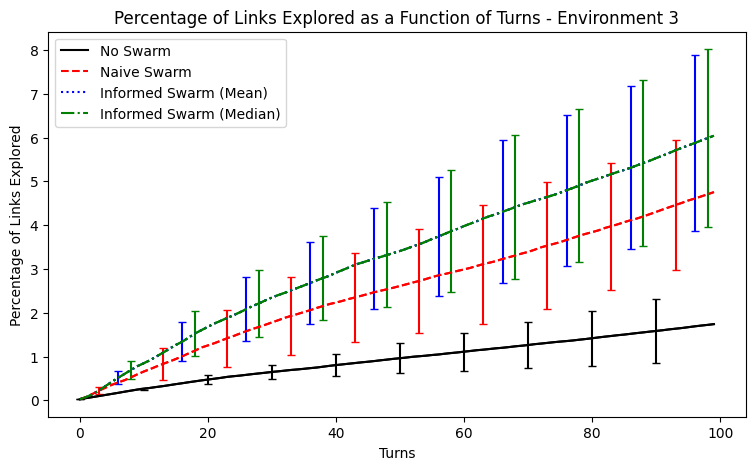

In [32]:
plt.figure(figsize=(9, 5))
plt.title("Percentage of Links Explored as a Function of Turns - Environment 3")
plt.xlabel("Turns")
plt.ylabel("Percentage of Links Explored")

# Plot the results for each swarm type, the error bars are the standard deviation
plt.plot(results_6_1_3.index, results_6_1_3['no-swarm-mean'], label='No Swarm', 
         color=swarm_type_to_colour['no-swarm'], linestyle=swarm_type_to_linestyle['no-swarm'])
plt.errorbar(results_6_1_3.index, results_6_1_3['no-swarm-mean'], 
             yerr=results_6_1_3['no-swarm-std'], 
             capsize=3, errorevery=swarm_type_to_errorbar['no-swarm'],
             color=swarm_type_to_colour['no-swarm'], linestyle=swarm_type_to_linestyle['no-swarm'])

plt.plot(results_6_1_3.index, results_6_1_3['naive-mean'], label='Naive Swarm',
            color=swarm_type_to_colour['naive'], linestyle=swarm_type_to_linestyle['naive'])
plt.errorbar(results_6_1_3.index, results_6_1_3['naive-mean'],
                yerr=results_6_1_3['naive-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['naive'],
                color=swarm_type_to_colour['naive'], linestyle=swarm_type_to_linestyle['naive'])

plt.plot(results_6_1_3.index, results_6_1_3['informed-mean-mean'], label='Informed Swarm (Mean)',
            color=swarm_type_to_colour['informed-mean'], linestyle=swarm_type_to_linestyle['informed-mean'])
plt.errorbar(results_6_1_3.index, results_6_1_3['informed-mean-mean'],
                yerr=results_6_1_3['informed-mean-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['informed-mean'],
                color=swarm_type_to_colour['informed-mean'], linestyle=swarm_type_to_linestyle['informed-mean'])

plt.plot(results_6_1_3.index, results_6_1_3['informed-median-mean'], label='Informed Swarm (Median)',
            color=swarm_type_to_colour['informed-median'], linestyle=swarm_type_to_linestyle['informed-median'])
plt.errorbar(results_6_1_3.index, results_6_1_3['informed-median-mean'],
                yerr=results_6_1_3['informed-median-std'],
                capsize=3, errorevery=swarm_type_to_errorbar['informed-median'],
                color=swarm_type_to_colour['informed-median'], linestyle=swarm_type_to_linestyle['informed-median'])


plt.legend()

plt.savefig(f'{fig_path}/pct-links-explored-env3.png', dpi=300)
plt.savefig(f'{fig_path}/pct-links-explored-env3.eps', dpi=300)


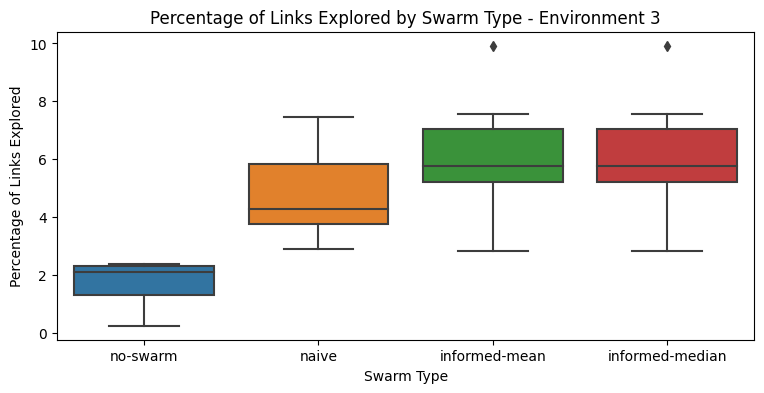

In [54]:
fig = plt.figure(figsize=(9, 4))
plt.title("Percentage of Links Explored by Swarm Type - Environment 3")

# Box plot of the results for each swarm type (the swarm type is the x-axis)
sns.boxplot(x='swarm_type', y='max_pct_links_explored', data=results6_1_3b)
plt.xlabel("Swarm Type")
plt.ylabel("Percentage of Links Explored")

# Save the figure as a png and an eps
plt.savefig(f'{fig_path}/pct-links-explored-boxplot-env3.png', dpi=300)
plt.savefig(f'{fig_path}/pct-links-explored-boxplot-env3.eps', dpi=300)

# Experiment 7-1

As `Experiment-7` but used for generating the graphs in the report.

## Function Definitions

In [55]:
def num_links_explored(simulations):
    num_links_explored = []
    for sim in simulations:
        start_node, path = sim
        results = pd.read_csv(f'{path}/results.csv')
        num_links_explored.append(results['abs_links_explored'].iloc[-1])
        
    return num_links_explored

def batch_num_links_explored(swarm_types, sim_batch):
    num_links = {}
    for swarm_type, sim in zip(swarm_types, sim_batch):
        num_links.update({swarm_type: num_links_explored(sim)})
        
    return num_links

def batch_mean_links_explored(swarm_types, sim_batch):
    means = {}
    for swarm_type, sim in zip(swarm_types, sim_batch):
        means[swarm_type] = np.mean(num_links_explored(sim))
        
    return means

## Environment 1

In [57]:
sims = [no_swarm_env1, naive_swarm_env1, informed_mean_swarm_env1, informed_median_swarm_env1]
env1_means = batch_mean_links_explored(swarm_types, sims)
env1_nums = batch_num_links_explored(swarm_types, sims)

no_swarm = env1_nums.get('no-swarm')
naive = env1_nums.get('naive')
informed_mean = env1_nums.get('informed-mean')
informed_median = env1_nums.get('informed-median')

### Post-Hoc Dunn's Test

In [65]:
# Perform the post-hoc Dunn's test using the scikit-posthocs library
data = np.array([no_swarm, naive, informed_mean, informed_median])
dunn = sp.posthoc_dunn(data, p_adjust='holm')

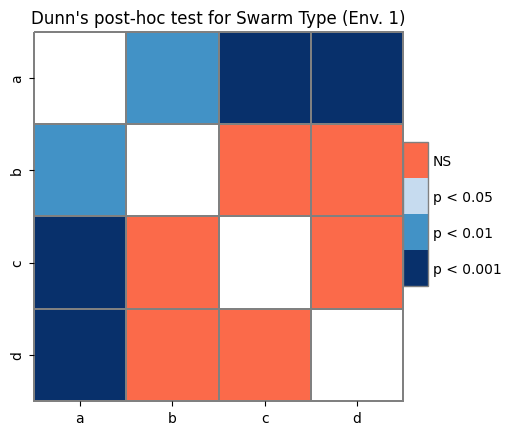

In [86]:
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
plot = sp.sign_plot(dunn, **heatmap_args)
ax, _ = plot # type: ignore
ax.set_title('Dunn\'s post-hoc test for Swarm Type (Env. 1)', fontsize=12)
# replace the swarm type labels with the swarm type names
labels = ['a', 'b', 'c', 'd']
# labels = ['No Swarm', 'Naive Swarm', 'Informed Swarm (Mean)', 'Informed Swarm (Median)']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Save the figure as a png and an eps
plt.savefig(f'{fig_path}/dunn-test-swarm-type-env1.png', dpi=300)
plt.savefig(f'{fig_path}/dunn-test-swarm-type-env1.eps', dpi=300)

## Environment 2

In [87]:
sims = [no_swarm_env2, naive_swarm_env2, informed_mean_swarm_env2, informed_median_swarm_env2]
env2_means = batch_mean_links_explored(swarm_types, sims)
env2_nums = batch_num_links_explored(swarm_types, sims)

no_swarm = env2_nums.get('no-swarm')
naive = env2_nums.get('naive')
informed_mean = env2_nums.get('informed-mean')
informed_median = env2_nums.get('informed-median')

### Post-Hoc Dunn's Test

In [88]:
# Perform the post-hoc Dunn's test using the scikit-posthocs library
data = np.array([no_swarm, naive, informed_mean, informed_median])
dunn = sp.posthoc_dunn(data, p_adjust='holm')

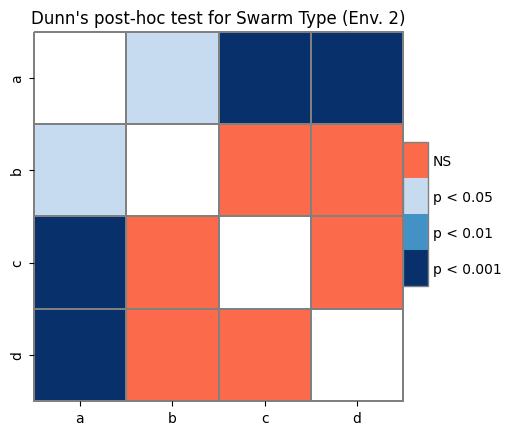

In [89]:
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
plot = sp.sign_plot(dunn, **heatmap_args)
ax, _ = plot # type: ignore
ax.set_title('Dunn\'s post-hoc test for Swarm Type (Env. 2)', fontsize=12)
# replace the swarm type labels with the swarm type names
labels = ['a', 'b', 'c', 'd']
# labels = ['No Swarm', 'Naive Swarm', 'Informed Swarm (Mean)', 'Informed Swarm (Median)']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Save the figure as a png and an eps
plt.savefig(f'{fig_path}/dunn-test-swarm-type-env2.png', dpi=300)
plt.savefig(f'{fig_path}/dunn-test-swarm-type-env2.eps', dpi=300)

## Environment 3

In [90]:
sims = [no_swarm_env3, naive_swarm_env3, informed_mean_swarm_env3, informed_median_swarm_env3]
env3_means = batch_mean_links_explored(swarm_types, sims)
env3_nums = batch_num_links_explored(swarm_types, sims)

no_swarm = env3_nums.get('no-swarm')
naive = env3_nums.get('naive')
informed_mean = env3_nums.get('informed-mean')
informed_median = env3_nums.get('informed-median')

### Post-Hoc Dunn's Test

In [91]:
# Perform the post-hoc Dunn's test using the scikit-posthocs library
data = np.array([no_swarm, naive, informed_mean, informed_median])
dunn = sp.posthoc_dunn(data, p_adjust='holm')

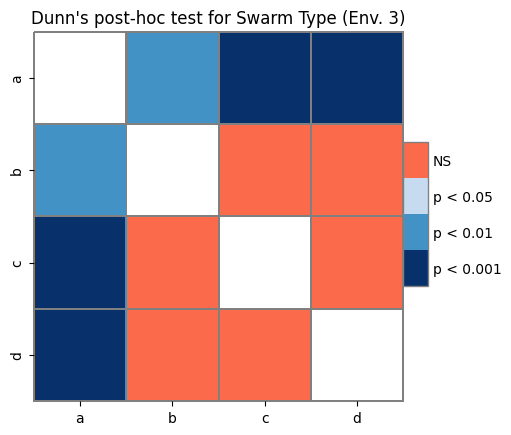

In [92]:
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
plot = sp.sign_plot(dunn, **heatmap_args)
ax, _ = plot # type: ignore
ax.set_title('Dunn\'s post-hoc test for Swarm Type (Env. 3)', fontsize=12)
# replace the swarm type labels with the swarm type names
labels = ['a', 'b', 'c', 'd']
# labels = ['No Swarm', 'Naive Swarm', 'Informed Swarm (Mean)', 'Informed Swarm (Median)']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Save the figure as a png and an eps
plt.savefig(f'{fig_path}/dunn-test-swarm-type-env3.png', dpi=300)
plt.savefig(f'{fig_path}/dunn-test-swarm-type-env3.eps', dpi=300)

# Experiment 8-1

As `Experiment-8` but used for generating the tables in the report.

In [108]:
def max_abs_all_start(swarm_types, sims):
    results = pd.DataFrame()
    
    for swarm_type, sim in zip(swarm_types, sims):
        for start_node, simulation_path in sim:
            path = f'{simulation_path}/results.csv'
            df = pd.read_csv(path)
            df.start_node = start_node
            # get the max abs_links_explored for the entire simulation run
            max_pct_links_explored = df.abs_links_explored.max()
            # add the mean values to the results dataframe for the given swarm type and start node
            temp = pd.DataFrame({'swarm_type': swarm_type, 'start_node': start_node, 'max_abs_links_explored': max_pct_links_explored}, index=[0])
            results = pd.concat([results, temp], ignore_index=True)
            
    return results

## Environment 1

In [111]:
sims = [no_swarm_env1, naive_swarm_env1, informed_mean_swarm_env1, informed_median_swarm_env1]
results_8_1_1 = max_abs_all_start(swarm_types, sims)
results_8_1_1.sample(5)

,swarm_type,start_node,max_abs_links_explored
36,informed-mean,219,94
43,informed-mean,1,100
50,informed-median,203,100
16,naive,35,97
46,informed-median,35,96


In [112]:
grouped = results_8_1_1.groupby('swarm_type')
means = grouped.mean()
stds = grouped.std()
cvs = stds / means * 100

# reverse the order of the categories for ease of viewing
means = means.iloc[::-1]
stds = stds.iloc[::-1]
cvs = cvs.iloc[::-1]

print("Descriptive Stats: Environment 1")
print()
print("Mean number of links explored:")
print(means)
print()
print("Standard deviation of number of links explored:")
print(stds)
print()
print("Coefficient of variation of number of links explored:")
print(cvs)
print()
print("--------------------------------------------------")
print()

Descriptive Stats: Environment 1

Mean number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      43.266667
naive                         84.800000
informed-median               99.466667
informed-mean                 99.466667

Standard deviation of number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      15.993153
naive                         30.515102
informed-median                8.399546
informed-mean                  8.399546

Coefficient of variation of number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      36.964145
naive                         35.984790
informed-median                8.444584
informed-mean                  8.444584

--------------------------------------------------



/tmp/ipykernel_19996/2887198790.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = grouped.mean()
/tmp/ipykernel_19996/2887198790.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = grouped.std()


## Environment 2

In [113]:
sims = [no_swarm_env2, naive_swarm_env2, informed_mean_swarm_env2, informed_median_swarm_env2]
results_8_1_2 = max_abs_all_start(swarm_types, sims)
results_8_1_2.sample(5)

,swarm_type,start_node,max_abs_links_explored
33,informed-mean,A5065,197
57,informed-median,A5184,182
15,naive,A2148,121
19,naive,A5071,198
31,informed-mean,A3007,181


In [114]:
grouped = results_8_1_2.groupby('swarm_type')
means = grouped.mean()
stds = grouped.std()
cvs = stds / means * 100

# reverse the order of the categories for ease of viewing
means = means.iloc[::-1]
stds = stds.iloc[::-1]
cvs = cvs.iloc[::-1]

print("Descriptive Stats: Environment 2")
print()
print("Mean number of links explored:")
print(means)
print()
print("Standard deviation of number of links explored:")
print(stds)
print()
print("Coefficient of variation of number of links explored:")
print(cvs)
print()
print("--------------------------------------------------")
print()

Descriptive Stats: Environment 2

Mean number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      64.266667
naive                        134.533333
informed-median              179.066667
informed-mean                179.066667

Standard deviation of number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      23.986504
naive                         58.783947
informed-median               40.972930
informed-mean                 40.972930

Coefficient of variation of number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      37.323399
naive                         43.694708
informed-median               22.881383
informed-mean                 22.881383

--------------------------------------------------



/tmp/ipykernel_19996/1061300685.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = grouped.mean()
/tmp/ipykernel_19996/1061300685.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = grouped.std()


## Environment 3

In [115]:
sims = [no_swarm_env3, naive_swarm_env3, informed_mean_swarm_env3, informed_median_swarm_env3]
results_8_1_3 = max_abs_all_start(swarm_types, sims)
results_8_1_3.sample(5)

,swarm_type,start_node,max_abs_links_explored
8,no-swarm,JUNCTION-45,81
18,naive,JUNCTION-21,110
37,informed-mean,JUNCTION-41,267
31,informed-mean,JUNCTION-16,221
14,no-swarm,JUNCTION-96,9


In [116]:
grouped = results_8_1_3.groupby('swarm_type')
means = grouped.mean()
stds = grouped.std()
cvs = stds / means * 100

# reverse the order of the categories for ease of viewing
means = means.iloc[::-1]
stds = stds.iloc[::-1]
cvs = cvs.iloc[::-1]

print("Descriptive Stats: Environment 3")
print()
print("Mean number of links explored:")
print(means)
print()
print("Standard deviation of number of links explored:")
print(stds)
print()
print("Coefficient of variation of number of links explored:")
print(cvs)
print()
print("--------------------------------------------------")
print()

Descriptive Stats: Environment 3

Mean number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      66.666667
naive                        182.133333
informed-median              231.400000
informed-mean                231.400000

Standard deviation of number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      30.499805
naive                         56.217520
informed-median               68.944906
informed-mean                 68.944906

Coefficient of variation of number of links explored:
                 max_abs_links_explored
swarm_type                             
no-swarm                      45.749707
naive                         30.866135
informed-median               29.794687
informed-mean                 29.794687

--------------------------------------------------



/tmp/ipykernel_19996/529428572.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = grouped.mean()
/tmp/ipykernel_19996/529428572.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = grouped.std()
